## (1) Data Description

This project uses two datasets collected from a UBC Minecraft research server. The first dataset, `players.csv`, contains one row per unique participant and includes demographic and gameplay-related variables: `Age`, `gender`, `experience` level, total `played_hours`, and a logical variable `subscribe` indicating whether the player subscribed to the project newsletter. These variables provide a mix of categorical and quantitative features that can be used to explore what kinds of players tend to subscribe.

The second dataset, `sessions.csv`, contains one row per gameplay session, linked to players through `hashedEmail`. It includes session timestamps and allows us to count how many sessions each player contributed. However, for this planning report, I focus primarily on `players.csv`, since subscription is measured at the individual level.

There are 196 players in the dataset. Age ranges widely (from around 9 to over 50), but most players fall between ages 15–25. Played hours are extremely right-skewed, with many players having low playtime and a few playing for many hours. Several variables are categorical (`gender`, `experience`, `subscribe`), and these will require appropriate encoding and scaling later.

Potential issues include class imbalance (more TRUE than FALSE in `subscribe`), which could make prediction harder, and the wide variation in `played_hours`, which may require transformation or scaling.


In [1]:
library(tidyverse)

players <- read_csv("players.csv")

# Quick structure check
glimpse(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


## (2) Questions

### Broad Question:
What player characteristics and behaviours are most predictive of subscribing to the Minecraft research newsletter?

### Specific Question:
Can age, experience level, and total played hours predict whether a player subscribes (`subscribe = TRUE`)?

These variables are directly available in `players.csv` and provide a mix of demographic and gameplay experience traits. Since `subscribe` is a binary outcome, this naturally leads to a classification problem. Exploring these variables helps us understand which player types are more likely to stay engaged with research-related communication.


In [ ]:
players %>%
  summarise(
    mean_age = mean(Age, na.rm = TRUE),
    mean_hours = mean(played_hours, na.rm = TRUE)
  )

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


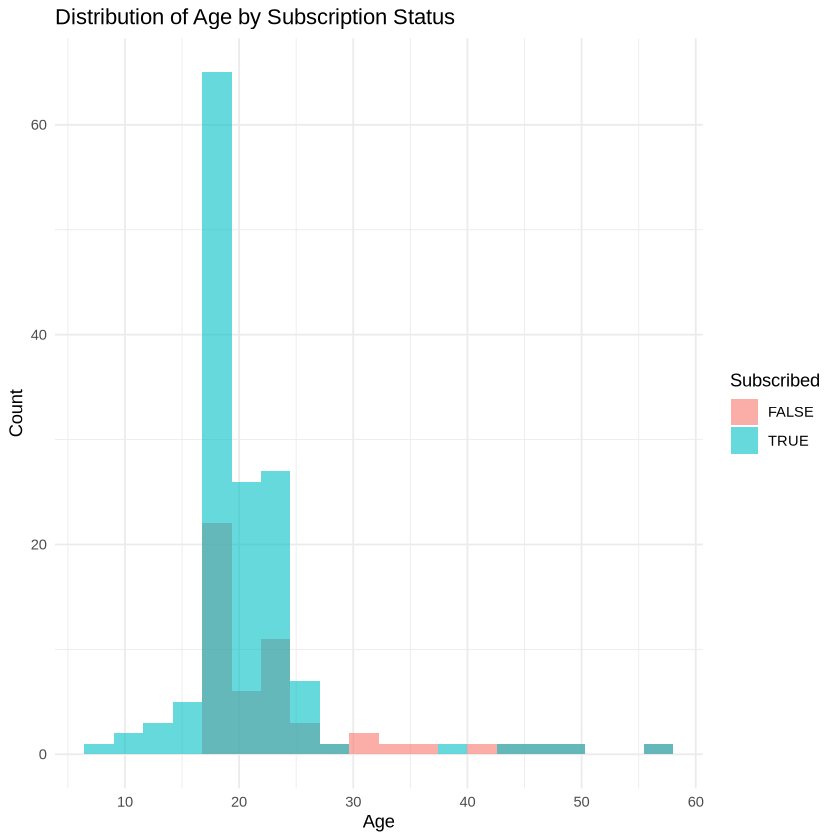

In [2]:
ggplot(players, aes(x = Age, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.6, bins = 20) +
  labs(title = "Distribution of Age by Subscription Status",
       x = "Age",
       y = "Count",
       fill = "Subscribed") +
  theme_minimal()

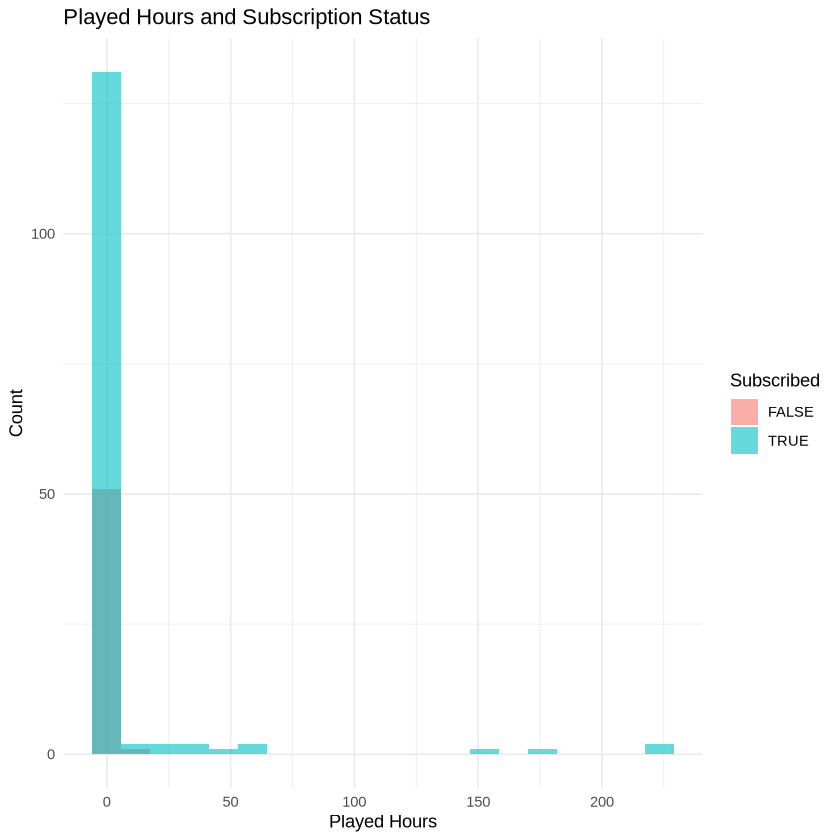

In [3]:
ggplot(players, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.6, bins = 20) +
  labs(title = "Played Hours and Subscription Status",
       x = "Played Hours",
       y = "Count",
       fill = "Subscribed") +
  theme_minimal()


From the exploratory analysis, subscription appears to be somewhat imbalanced, with more players marked as TRUE than FALSE. Age shows a fairly wide distribution among both subscribers and non-subscribers, suggesting that age alone might not be a strong predictor. Played hours are heavily right-skewed, with most players having low playtime. There may be a slight trend where players with higher played hours subscribe more often, but the pattern is not strong based on the histograms alone. These observations suggest that multiple variables together may help predict subscription, and that scaling or transformation may be required before applying a classification model such as KNN.

## (4) Methods and Plan

To answer my question about whether age, experience level, and played hours can predict a player’s subscription status, I plan to use the KNN classification model. Since `subscribe` is a TRUE/FALSE variable, KNN is a reasonable choice because it is straightforward, non-parametric, and works well when the goal is to classify observations based on similarity.

Before fitting the model, the data will need to be cleaned and preprocessed. In particular, KNN is very sensitive to how variables are scaled because it relies on distance calculations. This means that the numeric predictors (`Age` and `played_hours`) must be centered and scaled, and the categorical variable `experience` will need to be dummy-encoded so it can be included properly. Another limitation of KNN is that it can be influenced by outliers or imbalanced classes, which is relevant here because there are more subscribed players than unsubscribed ones.

For model evaluation, I plan to split the dataset into a training set (70%) and a testing set (30%). The training data will be used to tune the value of `k` using 5-fold cross-validation, where different `k` values are compared to find the one that performs best. Once the optimal `k` is chosen, I will apply the model to the test set to assess its accuracy and recall. Although I am not running the model yet in this planning stage, this workflow outlines the full approach I would use to analyze the data.

